# **Week-2: Data Preprocessing**

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv("/content/drive/MyDrive/train_dataset.csv")
test_df = pd.read_csv("/content/drive/MyDrive/test_dataset.csv")

# Display basic information about the training dataset
print("Training Dataset Info:")
print(train_df.info())
print("\nSample rows from Training Dataset:")
print(train_df.head())

# Display basic information about the test dataset
print("\nTest Dataset Info:")
print(test_df.info())
print("\nSample rows from Test Dataset:")
print(test_df.head())


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

Sample rows from Training Dataset:
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateT

In [ ]:
# Summary statistics of numerical attributes in the training dataset
train_stats = train_df.describe()

# Display the summary statistics
print(train_stats)


           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [ ]:
# Check for missing values in the training dataset
train_missing_values = train_df.isnull().sum()
print("Missing values in training dataset:")
print(train_missing_values)

# Check for missing values in the test dataset
test_missing_values = test_df.isnull().sum()
print("\nMissing values in test dataset:")
print(test_missing_values)


Missing values in training dataset:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

Missing values in test dataset:
DateTime    0
Junction    0
ID          0
dtype: int64


In [ ]:
# Checking for duplicates in the training dataset
duplicates_train = train_df.duplicated()
print("Number of duplicate rows in training dataset:", duplicates_train.sum())

# Removing duplicates from the training dataset
train_df = train_df[~duplicates_train]

# Checking for duplicates in the test dataset
duplicates_test = test_df.duplicated()
print("Number of duplicate rows in test dataset:", duplicates_test.sum())

# Removing duplicates from the test dataset
test_df = test_df[~duplicates_test]


Number of duplicate rows in training dataset: 0
Number of duplicate rows in test dataset: 0


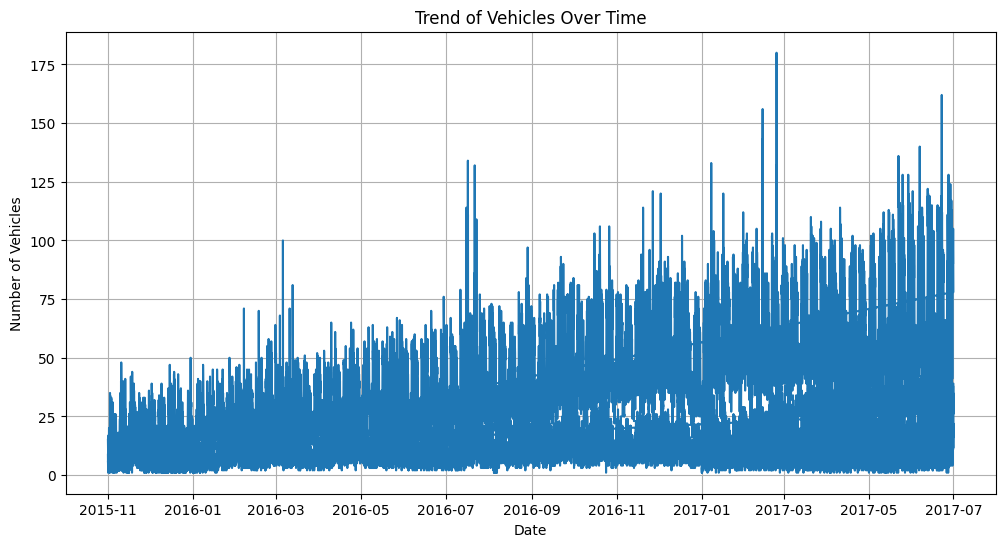

In [ ]:
import matplotlib.pyplot as plt

# Convert DateTime column to datetime type
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])

# Plotting the trend of vehicles over time
plt.figure(figsize=(12, 6))
plt.plot(train_df['DateTime'], train_df['Vehicles'])
plt.title('Trend of Vehicles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()


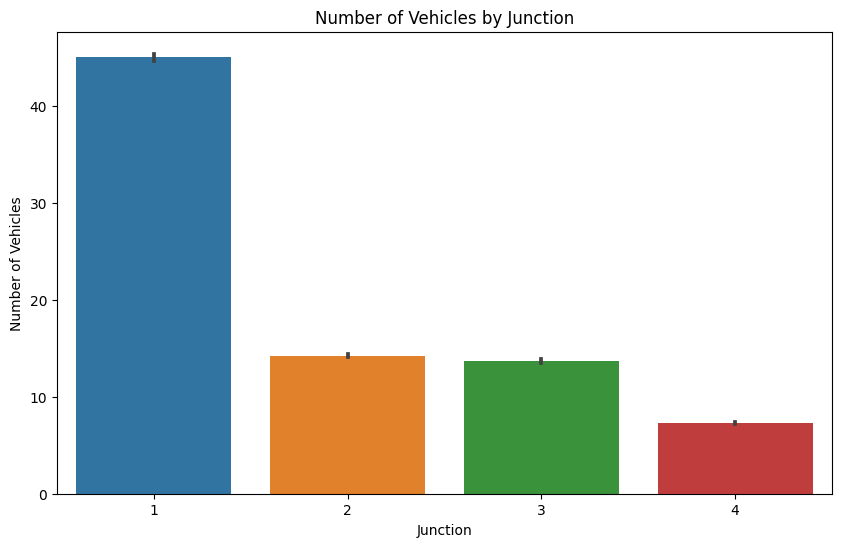

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Junction', y='Vehicles', data=train_df)
plt.title('Number of Vehicles by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()


In [ ]:
# Feature Engineering: Extracting date-time components
train_df['DateTime'] = pd.to_datetime(train_df['DateTime'])
test_df['DateTime'] = pd.to_datetime(test_df['DateTime'])

train_df['Year'] = train_df['DateTime'].dt.year
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Day'] = train_df['DateTime'].dt.day
train_df['Hour'] = train_df['DateTime'].dt.hour
train_df['Weekday'] = train_df['DateTime'].dt.weekday

test_df['Year'] = test_df['DateTime'].dt.year
test_df['Month'] = test_df['DateTime'].dt.month
test_df['Day'] = test_df['DateTime'].dt.day
test_df['Hour'] = test_df['DateTime'].dt.hour
test_df['Weekday'] = test_df['DateTime'].dt.weekday

# Convert 'Junction' to categorical
train_df['Junction'] = train_df['Junction'].astype('category')
test_df['Junction'] = test_df['Junction'].astype('category')

# Drop the original 'DateTime' column
train_df.drop(columns=['DateTime'], inplace=True)
test_df.drop(columns=['DateTime'], inplace=True)

# Display the updated dataset
print(train_df.head())
print(test_df.head())


  Junction  Vehicles           ID  Year  Month  Day  Hour  Weekday
0        1        15  20151101001  2015     11    1     0        6
1        1        13  20151101011  2015     11    1     1        6
2        1        10  20151101021  2015     11    1     2        6
3        1         7  20151101031  2015     11    1     3        6
4        1         9  20151101041  2015     11    1     4        6
  Junction           ID  Year  Month  Day  Hour  Weekday
0        1  20170701001  2017      7    1     0        5
1        1  20170701011  2017      7    1     1        5
2        1  20170701021  2017      7    1     2        5
3        1  20170701031  2017      7    1     3        5
4        1  20170701041  2017      7    1     4        5


In [ ]:
from datetime import datetime
import holidays

# Initialize the India holidays
india_holidays = holidays.India()

# Function to check if a date is a holiday or an event
def is_holiday_or_event(date_str):
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return int(date in india_holidays)

# Apply the function to the training dataset
train_df["IsHolidayOrEvent"] = train_df["Year"].astype(str) + "-" + train_df["Month"].astype(str) + "-" + train_df["Day"].astype(str)
train_df["IsHolidayOrEvent"] = train_df["IsHolidayOrEvent"].apply(is_holiday_or_event)

# Apply the function to the test dataset
test_df["IsHolidayOrEvent"] = test_df["Year"].astype(str) + "-" + test_df["Month"].astype(str) + "-" + test_df["Day"].astype(str)
test_df["IsHolidayOrEvent"] = test_df["IsHolidayOrEvent"].apply(is_holiday_or_event)

print(train_df.head())
print(test_df.head())


  Junction  Vehicles           ID  Year  Month  Day  Hour  Weekday  \
0        1        15  20151101001  2015     11    1     0        6   
1        1        13  20151101011  2015     11    1     1        6   
2        1        10  20151101021  2015     11    1     2        6   
3        1         7  20151101031  2015     11    1     3        6   
4        1         9  20151101041  2015     11    1     4        6   

   IsHolidayOrEvent  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
  Junction           ID  Year  Month  Day  Hour  Weekday  IsHolidayOrEvent
0        1  20170701001  2017      7    1     0        5                 0
1        1  20170701011  2017      7    1     1        5                 0
2        1  20170701021  2017      7    1     2        5                 0
3        1  20170701031  2017      7    1     3        5                 0
4        1  20170701041  2017      7    1     4        5                

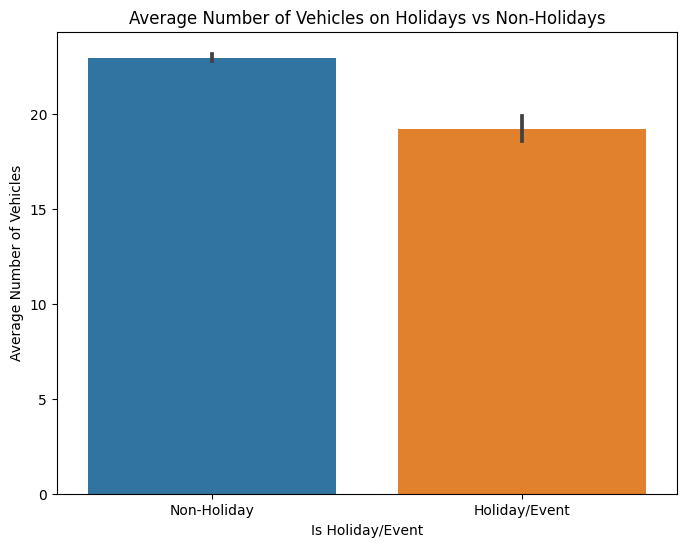

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='IsHolidayOrEvent', y='Vehicles', data=train_df)
plt.xlabel('Is Holiday/Event')
plt.ylabel('Average Number of Vehicles')
plt.title('Average Number of Vehicles on Holidays vs Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday/Event'])
plt.show()


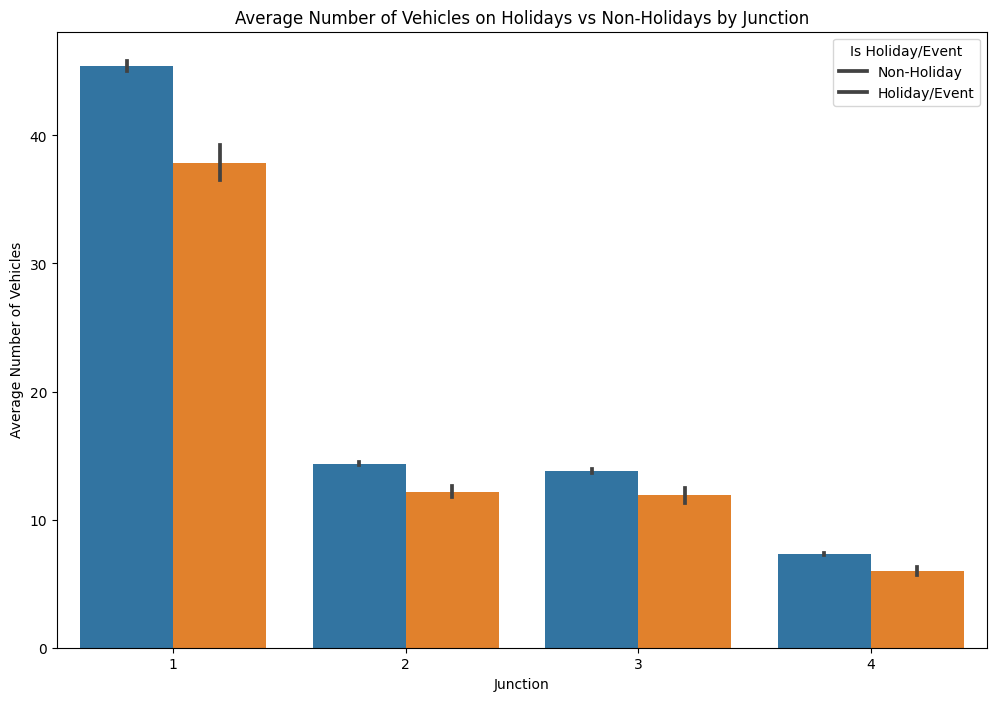

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Junction', y='Vehicles', hue='IsHolidayOrEvent', data=train_df)
plt.xlabel('Junction')
plt.ylabel('Average Number of Vehicles')
plt.title('Average Number of Vehicles on Holidays vs Non-Holidays by Junction')
plt.legend(title='Is Holiday/Event', labels=['Non-Holiday', 'Holiday/Event'])
plt.show()


# **Week-3: Model Training and Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data for all models
features = ['Junction', 'Year', 'Month', 'Day', 'Hour', 'Weekday', 'IsHolidayOrEvent']
X = train_df[features]
y = train_df['Vehicles']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_lr = linear_reg_model.predict(X_test)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Random Forest Regression
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Support Vector Machine (SVM) Regression
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Neural Network Regression
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)

# Print the predictions for all models
print("Linear Regression Predictions:", y_pred_lr)
print("Decision Tree Predictions:", y_pred_dt)
print("Random Forest Predictions:", y_pred_rf)
print("SVM Predictions:", y_pred_svm)
print("Neural Network Predictions:", y_pred_nn)

# Calculate metrics for all models
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, r2

mae_lr, mse_lr, r2_lr = calculate_metrics(y_test, y_pred_lr)
mae_dt, mse_dt, r2_dt = calculate_metrics(y_test, y_pred_dt)
mae_rf, mse_rf, r2_rf = calculate_metrics(y_test, y_pred_rf)
mae_svm, mse_svm, r2_svm = calculate_metrics(y_test, y_pred_svm)
mae_nn, mse_nn, r2_nn = calculate_metrics(y_test, y_pred_nn)

# Print the metrics for all models
print("\nMetrics for Linear Regression:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("\nMetrics for Decision Tree:")
print("Mean Absolute Error:", mae_dt)
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print("\nMetrics for Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print("\nMetrics for SVM:")
print("Mean Absolute Error:", mae_svm)
print("Mean Squared Error:", mse_svm)
print("R-squared:", r2_svm)
print("\nMetrics for Neural Network:")
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)


Linear Regression Predictions: [25.40654427 11.20834707 21.75810721 ... 28.21326595 10.96061442
 33.17371879]
Decision Tree Predictions: [ 9. 41.  6. ... 15.  8. 13.]
Random Forest Predictions: [ 9.75 48.48  8.   ... 14.59  8.03 14.7 ]
SVM Predictions: [15.04655391 15.38523163 15.01546267 ... 14.90584732 15.38376933
 15.42178348]
Neural Network Predictions: [19.60157765 14.11140139 14.92978917 ... 23.25222727  9.17945345
 32.56781156]

Metrics for Linear Regression:
Mean Absolute Error: 9.638740738466355
Mean Squared Error: 162.92898897010886
R-squared: 0.6002201185680951

Metrics for Decision Tree:
Mean Absolute Error: 3.1167913549459683
Mean Squared Error: 22.597672485453035
R-squared: 0.9445519493861904

Metrics for Random Forest:
Mean Absolute Error: 2.391056733167082
Mean Squared Error: 12.562361419368248
R-squared: 0.9691756550477266

Metrics for SVM:
Mean Absolute Error: 13.50926865640402
Mean Squared Error: 458.6651129246415
R-squared: -0.12542946237519992

Metrics for Neural N

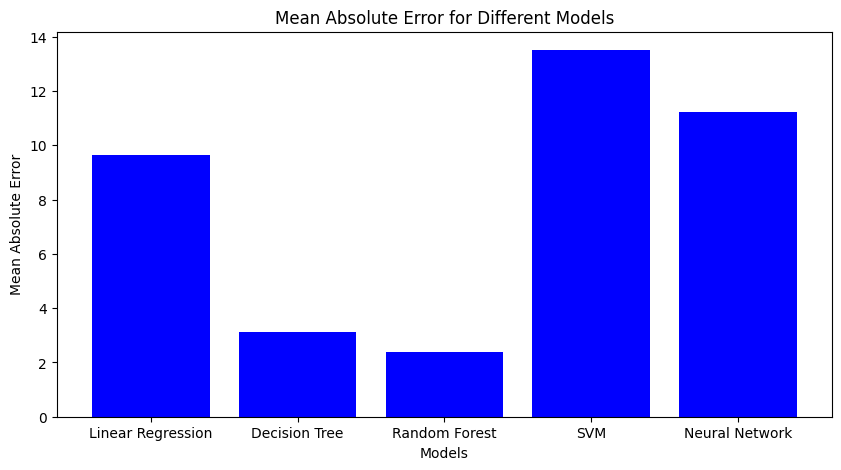

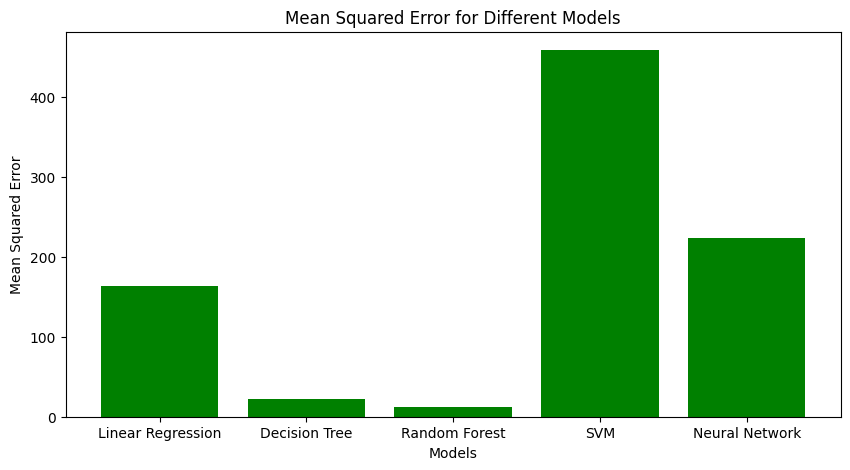

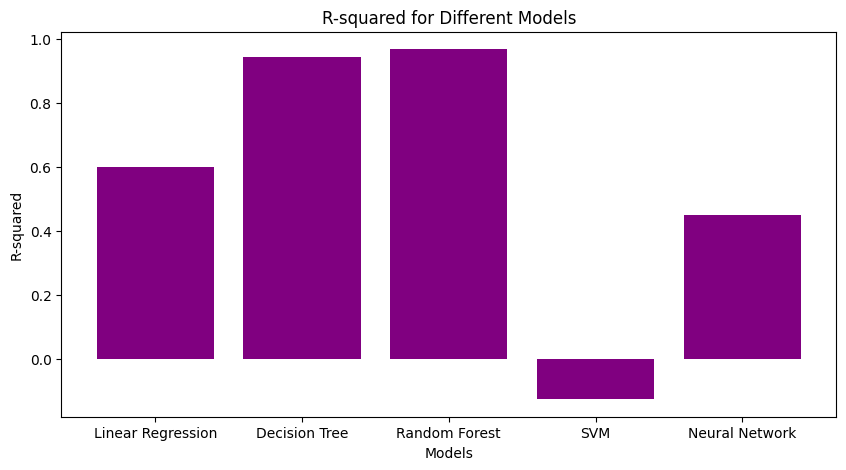

In [ ]:
import matplotlib.pyplot as plt

# Names of the models
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Neural Network']

# Error metrics for each model
mae_values = [mae_lr, mae_dt, mae_rf, mae_svm, mae_nn]
mse_values = [mse_lr, mse_dt, mse_rf, mse_svm, mse_nn]
r2_values = [r2_lr, r2_dt, r2_rf, r2_svm, r2_nn]

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error for Different Models')
plt.show()

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error for Different Models')
plt.show()

# Plotting R-squared (R2)
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_values, color='purple')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared for Different Models')
plt.show()


# **Week-4: Model Selection and Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Hyperparameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=None, max_features=1.0, min_samples_leaf=1, min_samples_split=2, n_estimators=150, random_state=42)

# Fit the model to the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_rf = best_rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for the best Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

# Print the metrics for the best Random Forest model
print("\nMetrics for Best Random Forest:")
print("Mean Absolute Error:", mae_best_rf)
print("Mean Squared Error:", mse_best_rf)
print("R-squared:", r2_best_rf)



Metrics for Best Random Forest:
Mean Absolute Error: 2.3905417013023
Mean Squared Error: 12.59529841137896
R-squared: 0.9690948373439896


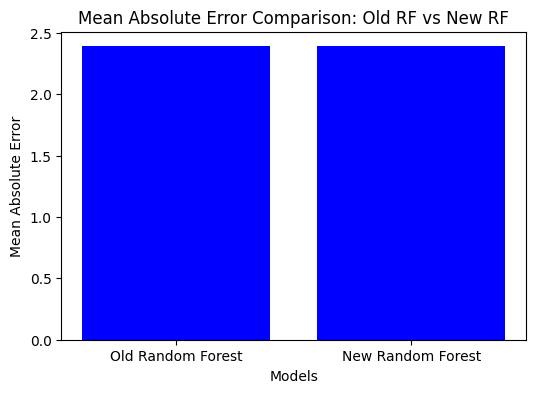

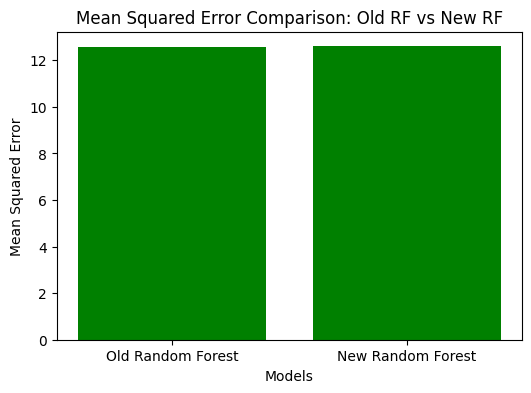

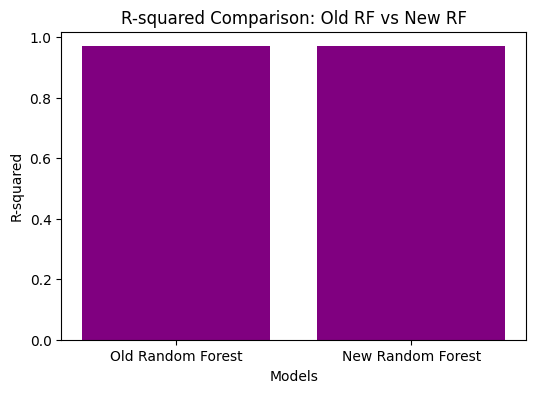

In [ ]:
import matplotlib.pyplot as plt

# Names of the models
model_names = ['Old Random Forest', 'New Random Forest']

# Error metrics for each model
mae_values = [mae_rf, mae_best_rf]
mse_values = [mse_rf, mse_best_rf]
r2_values = [r2_rf, r2_best_rf]

# Plotting Mean Absolute Error (MAE)
plt.figure(figsize=(6, 4))
plt.bar(model_names, mae_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison: Old RF vs New RF')
plt.show()

# Plotting Mean Squared Error (MSE)
plt.figure(figsize=(6, 4))
plt.bar(model_names, mse_values, color='green')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison: Old RF vs New RF')
plt.show()

# Plotting R-squared (R2)
plt.figure(figsize=(6, 4))
plt.bar(model_names, r2_values, color='purple')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison: Old RF vs New RF')
plt.show()


# **Week-5: Predicting on Unseen Data and Finalizing Predictions**

In [ ]:
X_unseen = test_df[features]

y_pred_unseen = best_rf_model.predict(X_unseen).round()


# Extract the ID column from the test dataset
predictions_data = {
    'ID': test_df['ID'],
    'Junction': test_df['Junction'],
    'Year': test_df['Year'],
    'Month': test_df['Month'],
    'Day': test_df['Day'],
    'Hour': test_df['Hour'],
    'Weekday': test_df['Weekday'],
    'IsHolidayOrEvent': test_df['IsHolidayOrEvent'],
    'Predicted_Vehicles': y_pred_unseen
}

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions_data)

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [ ]:
predictions_df.head()

,ID,Junction,Year,Month,Day,Hour,Weekday,IsHolidayOrEvent,Predicted_Vehicles
0,20170701001,1,2017,7,1,0,5,0,67.0
1,20170701011,1,2017,7,1,1,5,0,60.0
2,20170701021,1,2017,7,1,2,5,0,43.0
3,20170701031,1,2017,7,1,3,5,0,38.0
4,20170701041,1,2017,7,1,4,5,0,32.0
